In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

## **Data**

In [ ]:
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
274,57,26000,1
254,50,44000,0
314,39,79000,0
175,23,28000,0
126,42,65000,0


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [ ]:
x_train.shape, x_test.shape

((280, 2), (120, 2))

## **Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

array([3.76107143e+01, 6.88428571e+04])

Now converting this x_train_scaled (numpy array) to datafram

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
# np.round(x_train_scaled.describe(), 1)
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,-1.617754e-16,-5.075305e-17
std,1.001791e+00,1.001791e+00
min,-1.848782e+00,-1.594760e+00
25%,-8.117671e-01,-7.654340e-01
50%,-5.757452e-02,-5.458319e-02
75%,7.908921e-01,5.451972e-01
max,2.110729e+00,2.403776e+00


## **Effect of Scaling**

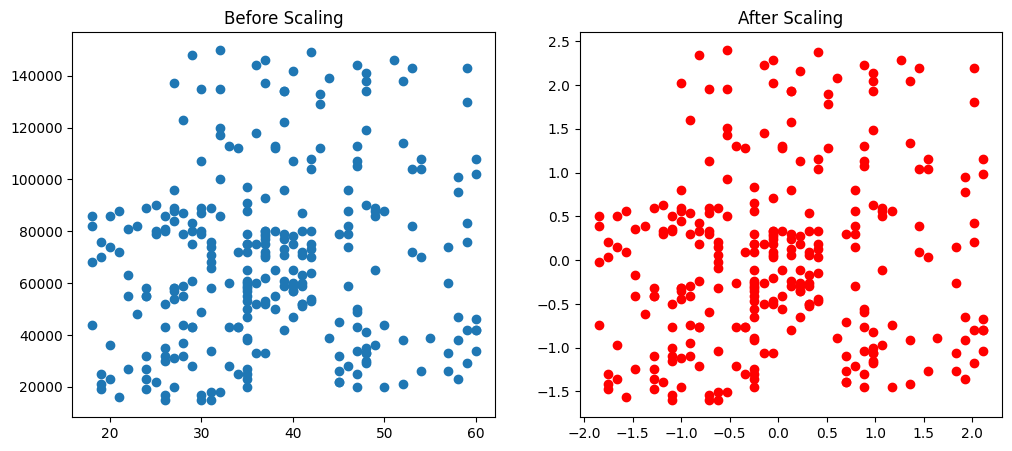

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

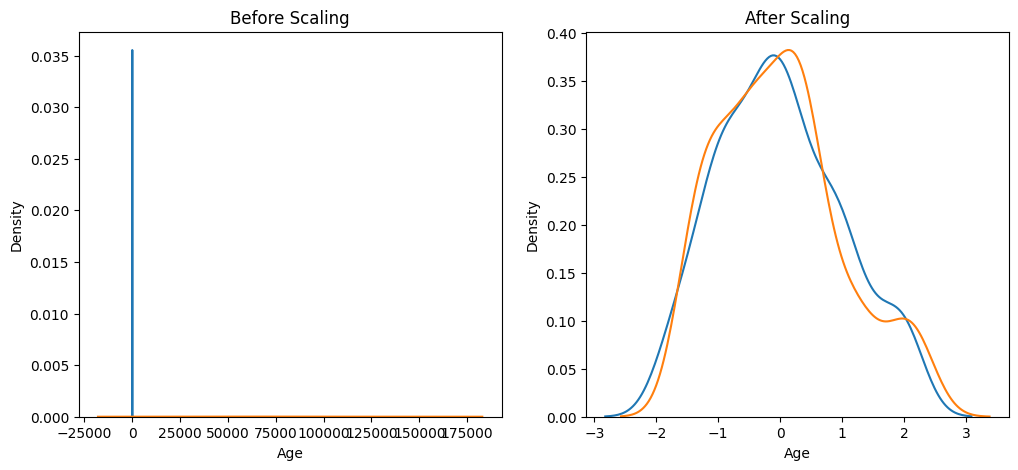

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After Scaling')

plt.show()

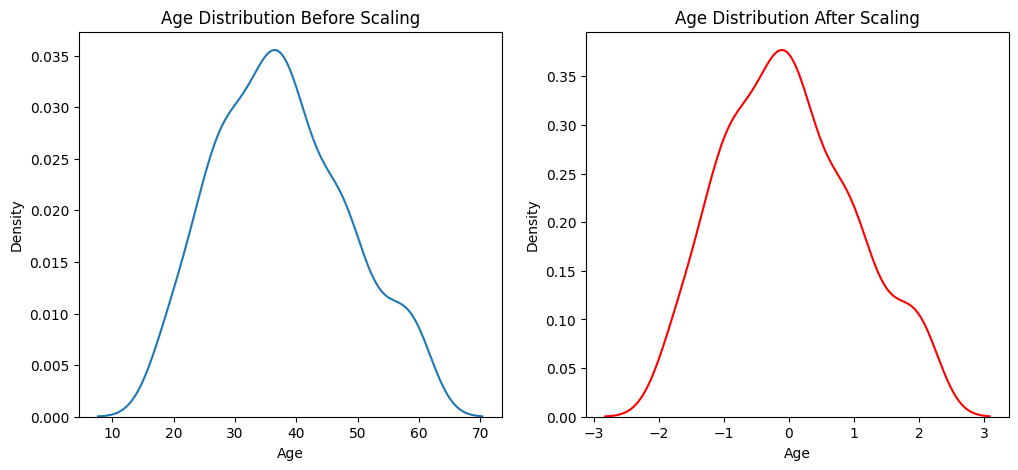

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['Age'], ax=ax1)
ax1.set_title('Age Distribution Before Scaling')

sns.kdeplot(x_train_scaled['Age'], ax=ax2, color='red')
ax2.set_title('Age Distribution After Scaling')

plt.show()

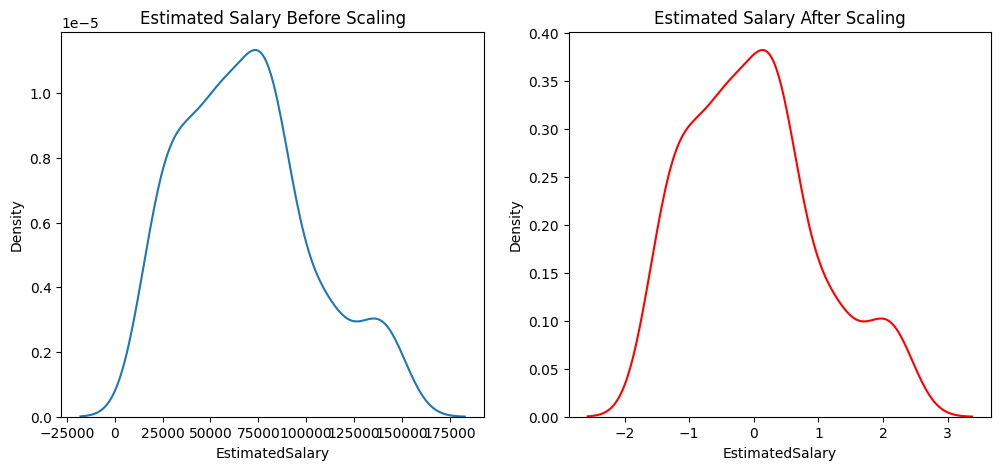

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Estimated Salary Before Scaling')

sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, color='red')
ax2.set_title('Estimated Salary After Scaling')

plt.show()

## **Model differentiation on basis of Scaling**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"Actual Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Scaled Accuracy: {accuracy_score(y_test, y_pred_scaled)}")

Actual Accuracy: 0.8666666666666667
Scaled Accuracy: 0.8666666666666667


# EXTRA

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_scaled = SVC()
svc_scaled.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test)
y_pred_svc_scaled = svc_scaled.predict(x_test_scaled)

print(f"Unscaled SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"Scaled SVC Accuracy: {accuracy_score(y_test, y_pred_svc_scaled)}")

Unscaled SVC Accuracy: 0.775
Scaled SVC Accuracy: 0.9083333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_scaled.fit(x_train_scaled, y_train)

print("KNN Unscaled Accuracy:", accuracy_score(y_test, knn.predict(x_test)))
print("KNN Scaled Accuracy:", accuracy_score(y_test, knn_scaled.predict(x_test_scaled)))


KNN Unscaled Accuracy: 0.8333333333333334
KNN Scaled Accuracy: 0.9083333333333333
